In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [6]:
data_train_path ='/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Colab Notebooks/Fruits_Vegetables/Fruits_Vegetables/validation'

In [7]:
img_width = 180
img_height =180

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3125 files belonging to 36 classes.


In [12]:
data_cat = data_train.class_names

In [13]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 361 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


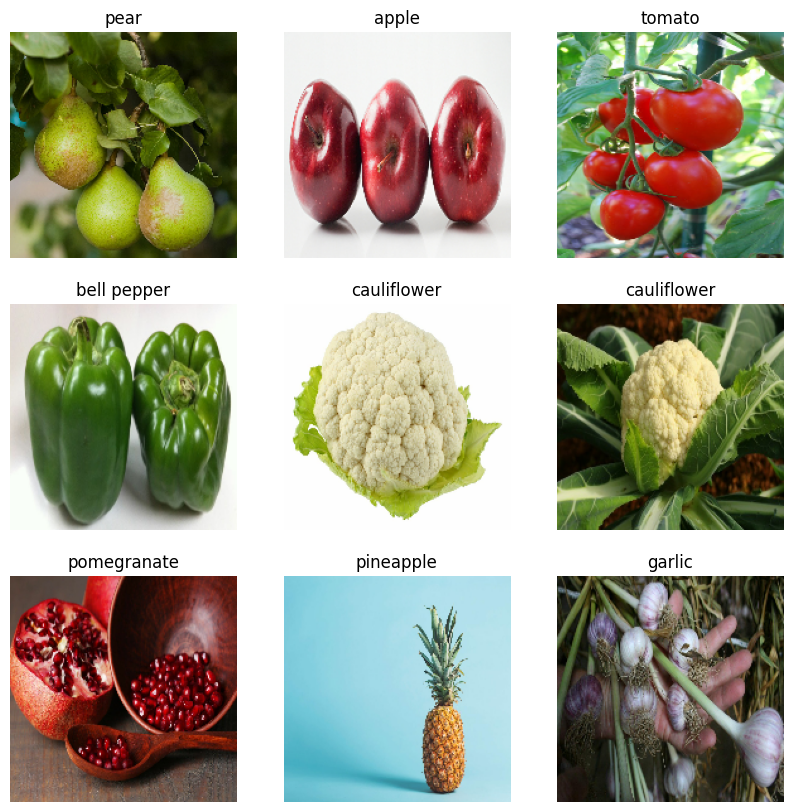

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - accuracy: 0.1033 - loss: 3.4278 - val_accuracy: 0.4155 - val_loss: 2.0603
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.3474 - loss: 2.3301 - val_accuracy: 0.6787 - val_loss: 1.2619
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5270 - loss: 1.6689 - val_accuracy: 0.8033 - val_loss: 0.7788
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.6840 - loss: 1.1098 - val_accuracy: 0.9197 - val_loss: 0.3721
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8339 - loss: 0.5767 - val_accuracy: 0.9197 - val_loss: 0.4419


Text(0.5, 1.0, 'Loss')

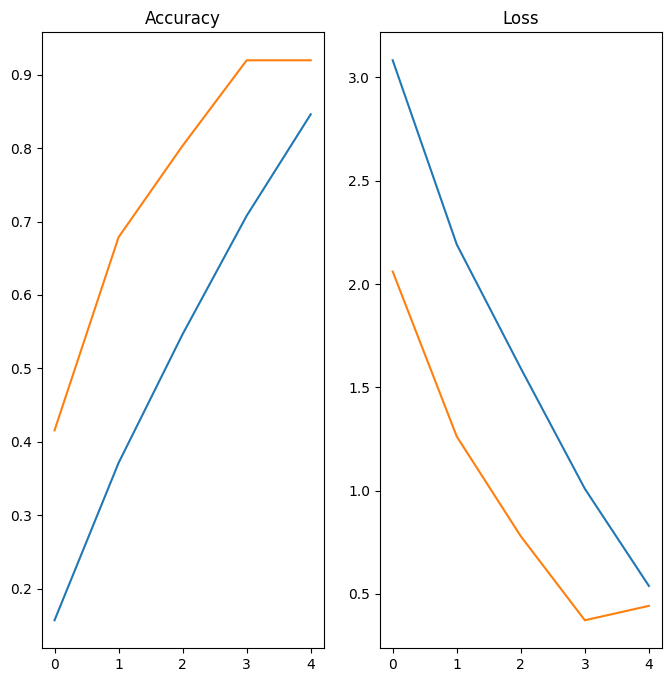

In [20]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [55]:
image ='/content/cabbaged.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [56]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [58]:
score = tf.nn.softmax(predict)

In [59]:
print('The given image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The given image is cabbage with accuracy of 99.54


In [25]:
model.save('Image_classify.keras')